## 힌국복지패널 데이터 분석
- 한국보건사회연구원에서 우리나가 가구의 경제활동을 연구한 데이터
- 전국 7,000여 가구를 선정하여 2006년 부터 매년 추적 조사한 자료
- 경제활동, 생활실태, 복지욕구 등 천여개 변수로 구성됨
- 통계 패키지 SPSS 전용 파일
- bit.ly/easypy_91

## 한국복지패널 데이터 분석 준비하기

### Lab 1 : 데이터 분석 준비하기

1. 데이터 준비하기
- Koweps_hpwc14_2019_beta2.sav 파일을 다운로드
- 2020년 발간된 복지패널 데이터로, 6331가구, 14,418명 정보를 담고 있음

2. 패키지 설치 및 로드하기
- 실습에 사용항 데이터 파일은 통계 분석 패키지인 SPSS 전용 파일임
- pyreadstat 패키지를 설치하면 SPSS, SAS, STATA등 다양한 통계 분석 소프트웨어 데이터 파일을 불러 올 수 있음
- pip install pyreadstat

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# pyreadstat 패키지 설치
!pip install pyreadstat

In [ ]:
# pyreadstat 패키지의 설치 정보 확인
!pip show pyreadstat

3. 데이터 불러오기
- pd.read_spss()로 데이터 불러오기
- df.copy()로 복사본을 만들어 분석에 활용함

In [ ]:
# SPSS 통계 패키지 전용 파일 데이터 불러오기
# SPSS(Statistical Package for the Social Sciences)는 사회 과학용 통계 패키지로 IBM 소유 패키지
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

In [ ]:
# 데이터 분석 작업용 복사본 만들기
welfare = raw_welfare.copy()

4. 데이터 검토하기
- 데이터의 특성을 살펴보기
- 행, 열 개수
- 변수 속성
- 요약 통계양

In [ ]:
# 데이터 구조 특징 살펴보기
# 변수의 수가 많고 변수명이 코드로 되어 있어서 전체 구조 파악이 힘들다.
welfare.head()

In [ ]:
welfare.tail()

In [ ]:
# 행과 열 개수 출력
welfare.shape

In [ ]:
# 변수 속성 출력
welfare.info()

In [ ]:
# 요약 통계량
welfare.describe()

5. 변수명 바꾸기
- 복지데이터와 같은 대규모 데이토는 변수의 수가 많고 변수명이 코드로 되어 있음
- 규모가 큰 조사 자료의 경우 데이터 특징을 설명한 코드북(codebook)을 함께 제공
- 코드북에는 변수명과 값의 의미가 설명되어 있음 (코드북을 통해 데이터 특징과 분석 방향 아이디어 도출)
- 복지 데이터 코드북 일부: Koweps_Codebook_2019.xlsl
- 복지 데이터 풀처 : bit.ly/easypy_91
- 7개 변수를 선정하여 분석함
   - (1단계) 변수검토 및 전처리 - 변수 특징을 파악하고, 이상치와 결측치 정제
   - (2단계) 변수 간 관계 분석 - 데이터 요약 표와 특징을 알 수 있는 그래프를 만들고 해석

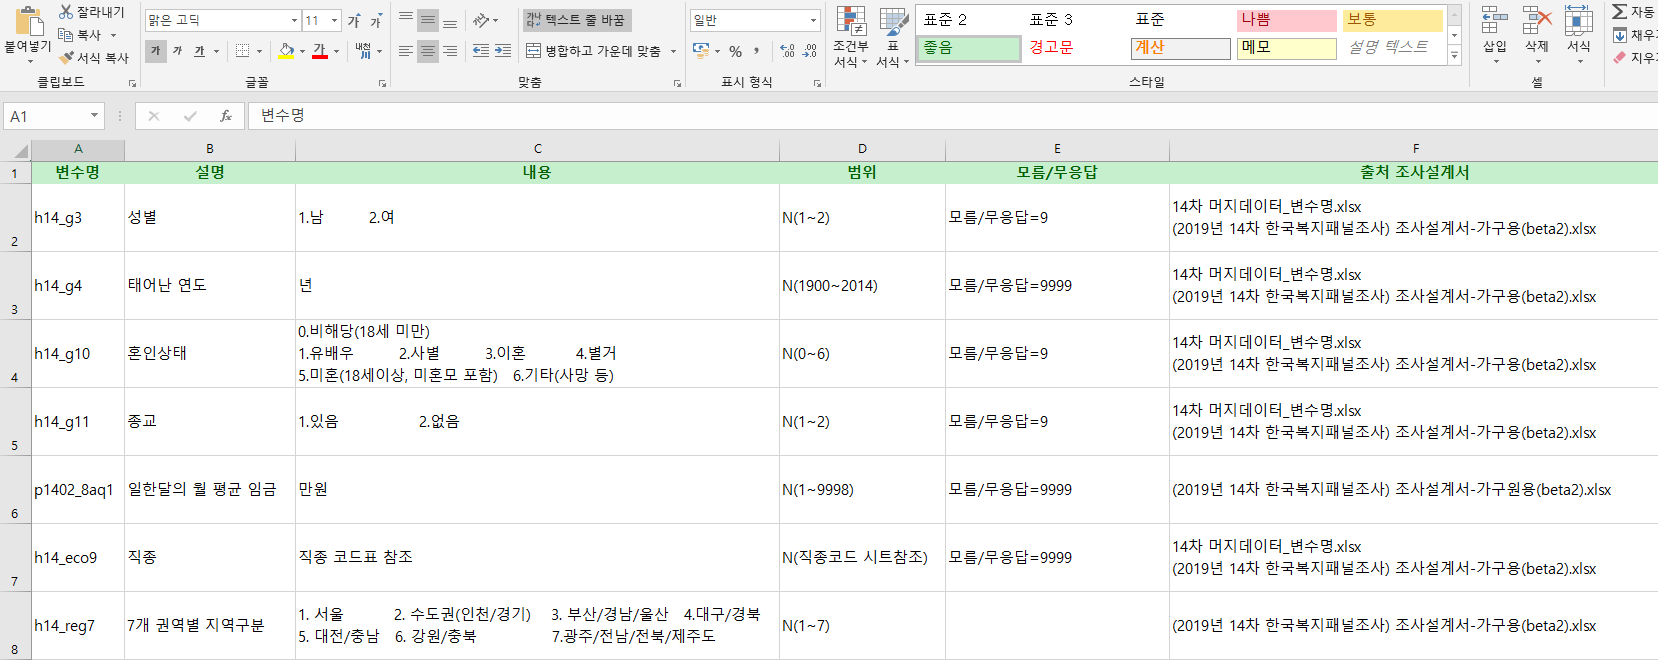

In [ ]:
# 코드북을 참조하여 분석에 사용할 7개 변수명을 알기쉬운 단어로 변경  
welfare = welfare.rename(
   columns = {'h14_g3'     : 'sex',              # 성별
              'h14_g4'     : 'birth',            # 태어난 연도
              'h14_g10'    : 'marriage_type',    # 혼인 상테
              'h14_g11'    : 'religion',         # 종교
              'p1402_8aq1' : 'income',           # 일한달의 월 평균 임금
              'h14_eco9'   : 'code_job',         # 직종
              'h14_reg7'   : 'code_region'       # 7개 권역별 지역 구분
             })

In [ ]:
# 바뀐 변수명으로 데이터 확인
welfare[['sex', 'birth', 'marriage_type']].head()

## 성별에 따른 월급 차이 - 성별에 따라 월급에 차이가 있을까?

### Lab 2 : 성별 변수 검토 및 전처리하기

1. 변수 검토 하기

In [ ]:
# 성별로 몇명이 있는지 확인
# 성별 변수의 데이터 타입 확인
welfare['sex'].dtypes

In [ ]:
# 성별로 몇명이 있는지 확인
# 성별 분류별 빈도 수 구하기 (성별은 1, 2로 구성)
welfare['sex'].value_counts()

- 성별 값에 대한 코드북 확인
- 여자 7913명, 남자 6505명
- 모름/무응답(9) 값은 없는 것으로 확인됨
|   값     |   내용      |
| ---      | ----        |
| 1        | 남자        |
| 2        | 여자        |
| 9        | 모름/무응답 |

2. 전처리 하기
- 남자(1), 여자(2) 값 이외에 모름/무응답(9)이나 기타 이상차가 있는 경우 결측 처리
- sex 변수의 값 1, 2에 대해 값의 의미를 알기 쉽도록 'male', 'female'로 변경

> 남자(1), 여자(2) 값 이외에 모름/무응답(9)이나 기타 이상차가 있는 경우 결측 처리

In [ ]:
# 이상치 확인
welfare['sex'].value_counts()

In [ ]:
# 이상치에 대한 결측치 처리
# 현재는 sex 변수에 대해 1, 2 값 이외의 이상치는 없으나 이상치에 대한 결측 처리 수행
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

In [ ]:
# 결측치 확인
welfare['sex'].isna().sum()

> sex 변수의 값 1, 2에 대해 값의 의미를 알기 쉽도록 'male', 'female'로 변경

In [ ]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

In [ ]:
# 성별 빈도 구하기
welfare['sex'].value_counts()

In [ ]:
# 성별 빈도수에 따른 막대 그래프 그리기
sns.countplot(data=welfare, x='sex')

### Lab 3 : 월급 변수 검토 및 전처리하기

1. 변수 검토 하기
- 코드북 : 월급은 '일한 달의 월 평균 임금'으로 1만원 단위 기록
- 월급은 연속 변수로 그룹별 빈도수(df.value_counts())로 파악하기 어려움
- 연속 변수는 df.describe()로 요약 통계량으로 파악하는 것이 바람직

In [ ]:
# 월급 변수의 데이터 타입 확인
welfare['income'].dtypes

In [ ]:
# 월급의 요약 통게량 구하기
welfare['income'].describe()

> 월급 요약 통계량 분석
- 0만원 ~ 1892만원 분포
- 150만원 ~ 345만원에 가장 많이 분포
- 평균 값은 268.445만원
- 중앙 값은 220만원 (전반적으로 낮은 값 쪽으로 치우쳐 있음)

In [ ]:
# 월급 분포를 히스토그램으로 확인
sns.histplot(data=welfare, x='income')

> 0 ~ 250만원 대에 가장 많은 사람이 분포하고, 그 뒤로 점차 빈도가 감소 

- 코드북을 보면, 원급은 만원 단위로 되어 있고
- 모름/무응답은 9999로 코딩됨
|  문항 내용    |  모름/무응답      |
| ---      | ----        |
| 만원      | 9999       |


> 이상치나 결측치 확인
- 월급의 값이 9999인 경우, 이상치로 판단하여 결측 처리
- 결측치 확인

In [ ]:
# 이상치 확인
welfare['income'].describe()

In [ ]:
welfare['income'].head()

> 이상치 확인 : 월급 최대치가 1892만원으로 모름/무응답인 9999값은 없는 것으로 확인

In [ ]:
# 결측치 확인
# 직업이 없어서 월급을 받지 못하는 응답자
welfare['income'].isna().sum()

> 결측치가 9884개가 있는 것으로 확인

In [ ]:
# 이상치(9999) 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [ ]:
# 결측치 확인
welfare['income'].isna().sum()

In [ ]:
# 결측치 제거
#welfare.dropna(subset=['income'])['income'].isna().sum()

## Lab 4 : 성별에 따른 월급 차이 분석하기

1. 성별 원급 평균표 만들기

In [ ]:
# 성별 월급 평균표 만들기
sex_income = welfare.dropna(subset = ['income'])\
                    .groupby('sex', as_index=False)\
                    .agg(mean_income = ('income', 'mean'))
sex_income

> 남성의 평균 월급은 349만원, 여성의 평균 월급은 186만원으로 남성이 여성보다 약 163만원이 많다

In [ ]:
# 그래프 만들기
sns.barplot(data=sex_income, x='sex', y='mean_income')

## 나이와 월급과의 관계 - 몇 살 때 월급이 가장 많을까 ?

### Lab 5 : 나이 변수 검토 및 전처리하기

1. 변수 검토하기

In [ ]:
# 출생년도 변수 타입 확인
welfare['birth'].dtypes

In [ ]:
# 출생년도 요약 통계량 구하기
welfare['birth'].describe()

> 출생년도 변수 요약 통계량 분석
- 출생녀도는 1907년 ~ 2018년까지 존재
- 평균 출생년도는 1969년임
- 출생년도는 1948년 ~ 1990년도에 대부분 몰려 있음

In [ ]:
# 히스토 그램 그려보기
sns.histplot(data=welfare, x='birth')

2. 전처리
- 무응답의 경우 9999로 코딩함

|   문항 내용   |  모름/응답    |
| ---           | ---           |
| 년            | 9999          |

In [ ]:
# 이상치 확인
welfare['birth'].describe()

> 출생년도가 1907년 ~ 2018년으로 무응답(9999) 데이터 또는 이상치는 없어 보임

> 이상치(무응답) 데이터 9999가 있는 경우는 결측치로 처리함

In [ ]:
# 이상치(9999)를 결측치 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

In [ ]:
# 결측치(nan) 확인
welfare['birth'].isna().sum()

> 결측치 없음 확인

3. 파생 변수 만들기
- 태어난 출생연도를 활용하여 나이 변수를 생성
- 2019년 조사가 진행되었음
- 나이(age)는 (2019 - 출생연도 + 1)로 구함 

In [ ]:
# 파생 변수 나이(age) 추가하기
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)

In [ ]:
# 파생변수 age의 요약 통계량 구하기
welfare['age'].describe()

> 나이는 2세 ~ 113세까지 존재, 평균 연령은 50세, 중간 값은 52세

In [ ]:
# 히스토그램 그리기
sns.histplot(data=welfare, x='age')

### Lab 6 : 나이와 월급과의 관계 분석하기

1. 나이에 따른 월급 평균표 만들기
- 2세 ~ 113세까지의 월급 평균 표를 만듬

In [ ]:
# 나이에 따른 월급 평균표 만들기
age_income = welfare.dropna(subset = ['income'])\
                    .groupby('age')\
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

2. 그래프 만들기
- 요약표를 이용하여 그래프 만들기
- x축 : 나이, y축 : 월급

In [ ]:
# 선그래프 만들기
sns.lineplot(data=age_income, x='age', y='mean_income')

> 20대 초반 150만원에서 시작하여 지속적으로 증가, 40대에 350만원 가량으로 정점을 찍은 후 감소

> 60대 후반 부터는 20대 보다 낮은 월급

## 연령대별 월급 차이 - 어느 연령대의 월급이 가장 많을까?

### Lab 7 : 연령대 변수 검토 및 전처리
- 연령대별 기준을 정하여 파생변수 생성
|    범주     |     기준     |
| ---         | -----        |
|초년층       | 30세 미만    |
|중년층       | 30세 ~ 59세  |
|노년층       | 60세 이상    |

In [ ]:
# 나이 변수 살펴 보기
welfare['age'].head()

In [ ]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <=59, 'middle',
                                                               'old' )))

In [ ]:
# 연령대별 빈도 구하기
welfare['ageg'].value_counts()

In [ ]:
# 연령대별 빈도 막대 그래프 그리기
sns.countplot(data=welfare, x='ageg')

### Lab 8 : 연령대에 따른 월급 차이 분석하기

1. 연령대 별 월급 평균표 만들기

In [ ]:
# 연령대 별 월급 평균표 만들기
ageg_income = welfare.dropna(subset=['income'])\
                    .groupby('ageg', as_index=False)\
                    .agg(mean_income=('income', 'mean'))

In [ ]:
ageg_income

2. 그래프 만들기

In [ ]:
# 막대 그래프 만들기
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

In [ ]:
# 막대 그래프 정렬하기
sns.barplot(data=ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old'])

> 중녕층이 330만원 정도로 가장 많은 월급을 받고, 노년층은 140만원 정도로 초년층의 195만원 보다 적게 받음

## 연령대별 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?

### Lab 9 : 연령대 및 성별 월급 차이 분석하기
- 연령대 및 성별에 따른 월급 평균 표 만들기

In [ ]:
# 연령대 및 성별에 따른 월급 평균 표 만들기
sex_income = \
    welfare.dropna(subset=['income']) \
           .groupby(['ageg', 'sex'], as_index=False) \
           .agg(mean_income = ('income', 'mean'))

In [ ]:
sex_income

2. 그래프 만들기

In [ ]:
# 막대 그래프 만들기
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex',
            order = ['young', 'middle', 'old'])

> 데이터 분석
- 성별 월급 차이가 초년에는 차이가 없다가 중년에 차이가 생겨 남성이 179만원 정보 많음
- 노년에는 성별 월급 차이가 줄지만 여전히 남성이 114만원 가량 더 많음
- 노년층이 초년층에 비해 월급이 줄어 들지만, 성별로 보면 노년층이 초년층에 비해 월급이 줄어드는 현상은 여성에 국한됨
- 중년층이 초년층에 비해 월금이 많아지는 현상도, 여성만으로 국한하면 여성은 중년층이 초년층과 크게 차이나지 않음

### Lab 10 : 나이 및 성별 월급 차이 분석하기
- 선 그래프를 이용하여 나이 및 성별에 따른 차이 분석

In [ ]:
# 나이 및 성별 월급 평균표 만들기
sex_age = welfare.dropna(subset=['income']) \
                .groupby(['age', 'sex'], as_index=False) \
                .agg(mean_income = ('income', 'mean'))

In [ ]:
sex_age.head()

In [ ]:
# 선 그래프 만들기
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

> 데이터 분석
- 남성의 월급은 50세 전후까지 증가하다가 급속히 감소
- 여성의 월급은 30세 초반까지 약간 증가하다가 완만하게 감소
- 성별 월급 차이는 30대 중반 부터 벌어지다가 50대에 크게 벌어지고, 이후 점점 줄어들어 80대가 되면 비슷해짐